In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm
from skimage.io import imread, imshow
from keras.preprocessing import image
import os 

print("All imports done")

Using TensorFlow backend.


All imports done


In [2]:
basedir = './dataset'
images_dir = os.path.join(basedir,'image')
labels_filename = 'label.csv'

In [3]:
img = imread(basedir +'/image/IMAGE_0006.jpg', as_gray=True)
feature_matrix = np.zeros((512,512)) 
feature_matrix.shape

(512, 512)

In [4]:
features = np.reshape(img, (512*512))
features.shape, features

((262144,),
 array([0.03529412, 0.03529412, 0.03529412, ..., 0.03137255, 0.03137255,
        0.03137255]))

(512, 512)


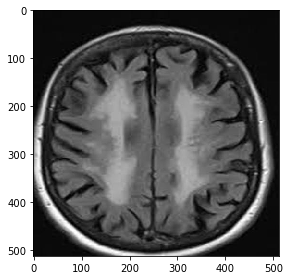

In [6]:
img = imread(basedir +'/image/IMAGE_0006.jpg', as_gray=True)
print(img.shape)
imshow(img)


In [7]:
features = np.reshape(img, (512*512))
print(features.shape)
features

(262144,)


array([0.03529412, 0.03529412, 0.03529412, ..., 0.03137255, 0.03137255,
       0.03137255])

In [8]:
basedir = './dataset'
labels_file = open(os.path.join(basedir, "/Users/youssefalaouimrani/Desktop/UCL /UCL 4th Year/Applied ML/Assignment/dataset/label.csv"), 'r')
lines = labels_file.readlines()
tumor_labels = {line.split(',')[0] : (line.split(',')[1].strip()) for line in lines[1:]}

for i in tumor_labels: 
    if tumor_labels[i] == 'no_tumor': 
        tumor_labels[i] = 0
    else:
        tumor_labels[i] = 1
print(tumor_labels)


{'IMAGE_0000.jpg': 1, 'IMAGE_0001.jpg': 0, 'IMAGE_0002.jpg': 1, 'IMAGE_0003.jpg': 1, 'IMAGE_0004.jpg': 1, 'IMAGE_0005.jpg': 1, 'IMAGE_0006.jpg': 0, 'IMAGE_0007.jpg': 1, 'IMAGE_0008.jpg': 1, 'IMAGE_0009.jpg': 1, 'IMAGE_0010.jpg': 1, 'IMAGE_0011.jpg': 1, 'IMAGE_0012.jpg': 1, 'IMAGE_0013.jpg': 1, 'IMAGE_0014.jpg': 1, 'IMAGE_0015.jpg': 1, 'IMAGE_0016.jpg': 1, 'IMAGE_0017.jpg': 1, 'IMAGE_0018.jpg': 1, 'IMAGE_0019.jpg': 0, 'IMAGE_0020.jpg': 0, 'IMAGE_0021.jpg': 1, 'IMAGE_0022.jpg': 1, 'IMAGE_0023.jpg': 1, 'IMAGE_0024.jpg': 1, 'IMAGE_0025.jpg': 1, 'IMAGE_0026.jpg': 1, 'IMAGE_0027.jpg': 0, 'IMAGE_0028.jpg': 1, 'IMAGE_0029.jpg': 1, 'IMAGE_0030.jpg': 1, 'IMAGE_0031.jpg': 1, 'IMAGE_0032.jpg': 1, 'IMAGE_0033.jpg': 1, 'IMAGE_0034.jpg': 1, 'IMAGE_0035.jpg': 1, 'IMAGE_0036.jpg': 0, 'IMAGE_0037.jpg': 1, 'IMAGE_0038.jpg': 1, 'IMAGE_0039.jpg': 1, 'IMAGE_0040.jpg': 1, 'IMAGE_0041.jpg': 1, 'IMAGE_0042.jpg': 0, 'IMAGE_0043.jpg': 1, 'IMAGE_0044.jpg': 1, 'IMAGE_0045.jpg': 1, 'IMAGE_0046.jpg': 1, 'IMAGE_0047.

In [9]:
all_features = []
all_labels = []

image_paths = [os.path.join(images_dir, l) for l in os.listdir(images_dir)]
print(images_dir)
counter = 0
if os.path.isdir(images_dir):
    all_features = []
    all_labels = []
    for img_path in image_paths:
        filename = img_path.split('/')[-1]
        img = imread(img_path, as_gray=True)
        features = np.reshape(img, (512*512))
        features.shape, features
        all_features.append(features)
        all_labels.append(tumor_labels[filename])
        


./dataset/image


In [10]:
np_features = np.array(all_features)
np_labels = np.array(all_labels)


In [11]:
X = np_features
y = np_labels

Y = np.array([y, -(y - 1)]).T
tr_X = X[:2400]
tr_Y = Y[:2400]
te_X = X[2400:]
te_Y = Y[2400:]




In [12]:
classifier = svm.SVC(kernel='linear')
classifier.fit(tr_X, list(zip(*tr_Y))[0])

pred = classifier.predict(te_X)

print(pred)

print("Accuracy:", accuracy_score(list(zip(*te_Y))[0], pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 

In [21]:
import numpy as np
import os
from skimage.io import imread, imshow

basedir = './dataset'
images_dir = os.path.join(basedir,'image')
labels_filename = 'label.csv'
img = imread(basedir +'/image/IMAGE_0006.jpg', as_gray=True)

img.shape

(512, 512)